In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv("./faces_and_labels.csv")

In [94]:
df.head()

,image_path,name
0,C:\Users\PC.DESKTOP-QK1F62J\Pictures\Camera Ro...,Tristan
1,C:\Users\PC.DESKTOP-QK1F62J\Pictures\Camera Ro...,Andrew
2,C:\Users\PC.DESKTOP-QK1F62J\Pictures\Camera Ro...,nimo
3,C:\Users\PC.DESKTOP-QK1F62J\Pictures\Camera Ro...,nimo
4,C:\Users\PC.DESKTOP-QK1F62J\Pictures\Camera Ro...,Tristan


In [83]:
df = df.sample(frac = 1 ).reset_index(drop = True)

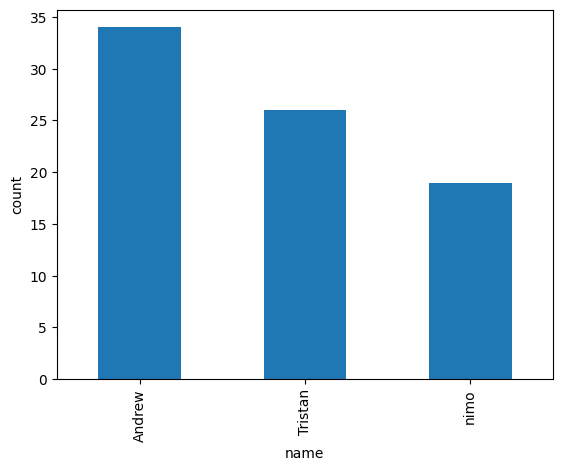

In [84]:
name_counts = df["name"].value_counts()
name_counts.plot(kind="bar")
plt.xlabel("name")
plt.ylabel("count")
plt.show()

In [85]:
images = []
labels = []

for i,img in df.iterrows():
    image = cv2.imread(img["image_path"])
    image = cv2.resize(image, (244,244))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_normalized = image_rgb / 255.0

    images.append(image_normalized)
    labels.append(img["name"])
    
    # plt.imshow(image_normalized)
    # plt.title(img["name"])
    # plt.show()

In [86]:
# Convert images and labels to numpy arrays for model training
images = np.array(images)
labels = np.array(labels)

print(images)

[[[[0.45882353 0.3254902  0.04313725]
   [0.37647059 0.25882353 0.1372549 ]
   [0.32941176 0.19607843 0.10196078]
   ...
   [0.01960784 0.1372549  0.0745098 ]
   [0.09803922 0.1372549  0.06666667]
   [0.08627451 0.15294118 0.02745098]]

  [[0.48627451 0.32156863 0.12941176]
   [0.4745098  0.3372549  0.22352941]
   [0.35294118 0.21176471 0.1254902 ]
   ...
   [0.03137255 0.13333333 0.09019608]
   [0.09411765 0.14117647 0.07058824]
   [0.07843137 0.14901961 0.09019608]]

  [[0.46666667 0.27843137 0.19607843]
   [0.48235294 0.32941176 0.23137255]
   [0.41568627 0.27058824 0.18431373]
   ...
   [0.05882353 0.14117647 0.10588235]
   [0.09019608 0.14117647 0.0745098 ]
   [0.07843137 0.15294118 0.16862745]]

  ...

  [[0.19215686 0.06666667 0.10980392]
   [0.21176471 0.07058824 0.10980392]
   [0.20784314 0.06666667 0.10588235]
   ...
   [0.20784314 0.10980392 0.09411765]
   [0.21960784 0.10980392 0.10588235]
   [0.17254902 0.09803922 0.04313725]]

  [[0.18823529 0.0627451  0.12156863]
   [0.1

In [87]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print(encoded_labels)

[1 0 2 2 1 2 0 1 0 1 0 0 2 1 0 1 0 0 2 1 0 0 1 0 0 1 1 1 2 2 0 2 1 0 1 0 2
 2 0 0 2 2 1 0 0 1 0 2 2 1 1 2 1 1 1 1 1 0 0 0 2 0 1 2 2 0 0 0 0 0 1 1 2 0
 0 0 1 0 0]


In [88]:
x_train, x_test, y_train, y_test = train_test_split(images , encoded_labels, random_state=42, test_size=0.2)


In [89]:
from tensorflow.keras.utils import to_categorical
num_classes = len(set(labels))  # Total number of classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [90]:
import tensorflow as tf 
from tensorflow.keras import layers,  models, Sequential



In [91]:
model = Sequential([
    layers.Conv2D(32, (3,3), input_shape=(244,244,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(set(labels)), activation="softmax")
    
])

model.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

C:\Users\PC.DESKTOP-QK1F62J\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 242, 242, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 119, 119, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 57, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 415872)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      53,231,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,325,379 (203.42 MB)

 Trainable params: 53,325,379 (203.42 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.fit(x_train, y_train, epochs=10 ,validation_data=(x_test, y_test) , verbose=True)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 51s 11s/step - accuracy: 0.5782 - loss: 35.9493 - val_accuracy: 0.9375 - val_loss: 0.6704
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 8s/step - accuracy: 0.7153 - loss: 2.2634 - val_accuracy: 0.3750 - val_loss: 4.9108
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.3581 - loss: 4.6032 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.9577 - loss: 0.2063 - val_accuracy: 0.9375 - val_loss: 0.0946
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.8740 - loss: 0.7564 - val_accuracy: 1.0000 - val_loss: 4.2762e-04
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9375 - val_loss: 0.2524
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 1.0000 - loss: 5.1001e-04 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 1.0000 - loss: 1.3412e-05 - val_accuracy: 1.0000 - val_loss: 1.37

In [93]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.00


In [79]:
# import numpy as np
# import matplotlib.pyplot as plt

# predictions = model.predict(x_test)
# predicted_labels = np.argmax(predictions, axis=1)

# true_labels = np.argmax(y_test, axis=1)


# N = 10  # Number of test samples to visualize
# for i in range(N):
#     plt.imshow(x_test[i])  # Display the test image
#     plt.axis('off')
#     plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
#     plt.show()
